In [1]:
# Importing dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Reading in data from csv files
outages_2020 = pd.read_csv("Resources/eaglei_outages_2020.csv")
outages_2021 = pd.read_csv("Resources/eaglei_outages_2021.csv")
outages_2022 = pd.read_csv("Resources/eaglei_outages_2022.csv")
outages_2023 = pd.read_csv("Resources/eaglei_outages_2023.csv")


In [8]:
# Creating dataframes keeping only data for chosen states
state_outages_2020 = outages_2020[outages_2020["state"].isin(["Texas", "North Carolina", "New York"])]

texas_outages_2020 = outages_2020[outages_2020["state"] == "Texas"]
texas_outages_2021 = outages_2021[outages_2021["state"] == "Texas"]
texas_outages_2022 = outages_2022[outages_2022["state"] == "Texas"]
texas_outages_2023 = outages_2023[outages_2023["state"] == "Texas"]

# Grouping by state and summing all outages to find total
infra_2020_df = pd.DataFrame(state_outages_2020.groupby(["state"])["customers_out"].sum())

infra_2020_df

,customers_out
state,
New York,345923021.0
North Carolina,148045759.0
Texas,291908278.0


In [10]:
# Resetting Index
infra_2020_df = infra_2020_df.reset_index()

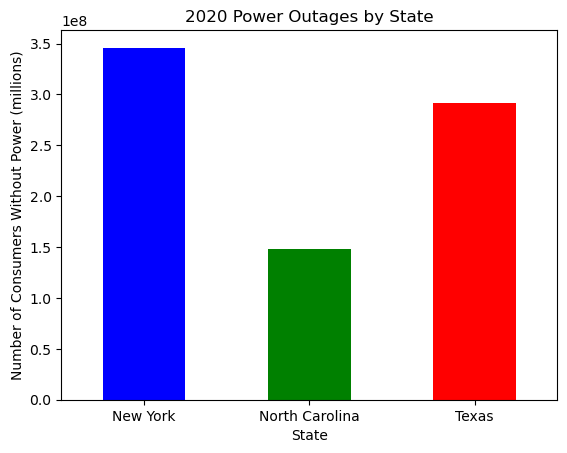

In [24]:
# Formatting chart
infra_2020_df = infra_2020_df.rename(columns={"state": "State", "customers_out": "Total Outages"})
infra_2020_df["Total Outages"] = infra_2020_df["Total Outages"].astype(int)


# Plotting chart
infra_2020_df.plot(kind="bar", x="State", y="Total Outages", color=["blue", "green", "red"])
plt.title("2020 Power Outages by State")
plt.xticks(rotation=0)
plt.ylabel("Number of Consumers Without Power (millions)")
plt.legend().remove()

# Saving figure
plt.savefig("Visualizations/2020_all_state_outages.png")

In [13]:
# Calculating total outages in Texas for years 2021 - 2023
total_tx_outages_2020 = texas_outages_2020["customers_out"].sum()
total_tx_outages_2021 = texas_outages_2021["customers_out"].sum()
total_tx_outages_2022 = texas_outages_2022["customers_out"].sum()
total_tx_outages_2023 = texas_outages_2023["sum"].sum()

# Creating dataframe
years = ["2020", "2021", "2022", "2023"]
all_outages = [total_tx_outages_2020, total_tx_outages_2021, total_tx_outages_2022, total_tx_outages_2023]
texas_df = pd.DataFrame({"Year": years, "Total Outages": all_outages})
texas_df["Year"] = pd.to_numeric(texas_df["Year"])

# Formatting
texas_df["Total Outages"] = texas_df["Total Outages"].astype(int)


In [14]:
texas_df

,Year,Total Outages
0,2020,291908278
1,2021,1153456237
2,2022,217404376
3,2023,442150760


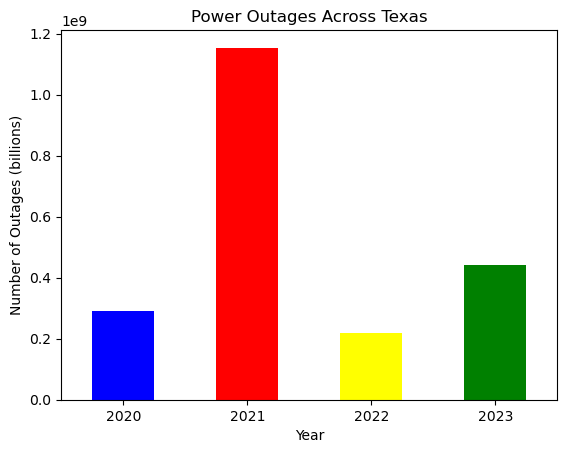

In [23]:
# Creating bar chart for Texas power outages
colors = ["blue", "red", "yellow", "green"]
texas_df.plot(kind='bar', x="Year", y="Total Outages", color = colors)
plt.title('Power Outages Across Texas')
plt.xticks(rotation=0)
plt.ylabel("Number of Outages (billions)")
plt.legend().remove()

# Saving figure
plt.savefig("Visualizations/texas_outages.png")

In [16]:
# Creating data frame for car accidents in Texas
tx_accidents = pd.DataFrame({"Year": [2020, 2021], 
 "Failed to control speed": [2909, 3758], 
 "Unsafe Speed": [1737, 2072], 
 "Faulty Evasive Action": [979, 1137],
 "Failed to Drive in Single Lane": [2241, 2939]})

# Adding column values to create a "Total Accidents" column
row_sums = tx_accidents.iloc[:, 1:].sum(axis=1)
tx_accidents["Total Accidents"] = row_sums

tx_accidents

,Year,Failed to control speed,Unsafe Speed,Faulty Evasive Action,Failed to Drive in Single Lane,Total Accidents
0,2020,2909,1737,979,2241,7866
1,2021,3758,2072,1137,2939,9906


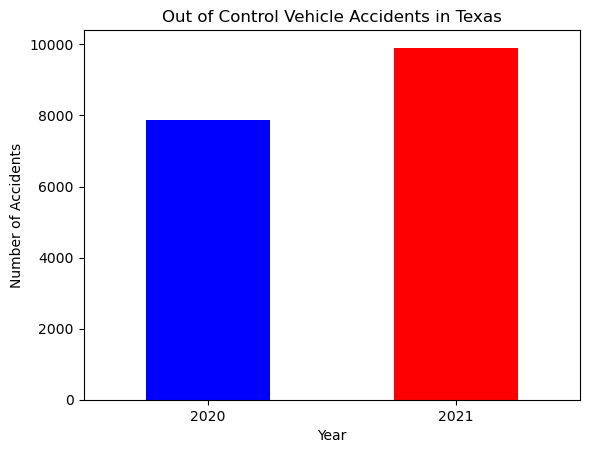

In [25]:
# Plotting Texas car accident chart
tx_accidents.plot(kind="bar", x="Year", y="Total Accidents", color=["blue", "red"])
plt.title("Out of Control Vehicle Accidents in Texas")
plt.xticks(rotation=0)
plt.ylabel("Number of Accidents")
plt.legend().remove()

# Saving figure
plt.savefig("Visualizations/texas_car_accidents.png")